ANEMO allows you to perform Fits on data of Smooth Pursuite Eyes Movements. You could use the functions ``‘velocity’``, ``‘position’`` and ``‘saccades’`` already present, but also your own functions.

It must be initialized with the parameters of the experiment :

# The parameters of the experiment

In [1]:
import numpy as np

screen_width_px = 1280 # px
screen_width_cm = 36   # cm
viewingDistance = 57.  # cm

screen_width_deg = 2. * np.arctan((screen_width_cm/2) / viewingDistance) * 180/np.pi


param_exp = {# OBLIGATORY :
                # - number of trials per block :
                      'N_trials' : 2,
                # - number of blocks :
                      'N_blocks' : 2,
                # - direction of the target :
                    # list of lists for each block containing the direction of
                    # the target for each trial is to -1 for left 1 for right
                      'dir_target' : [[-1, 1], [1, -1]],
                # - number of px per degree for the experiment :
                      'px_per_deg' : screen_width_px / screen_width_deg,
             # OPTIONAL :
                # - subject name :
                      'observer' : 'test',
                # - list of the names of the events of the trial :
                      'list_events' : ['StimulusOn\n', 'StimulusOff\n',
                                      'TargetOn\n', 'TargetOff\n'],
                # - target velocity in deg/s :
                      'V_X_deg' : 15,
                # - presentation time of the target :
                      'stim_tau' : 0.75,
                # - the time the target has to arrive at the center of the screen in ms,
                    # to move the target back to t=0 of its RashBass = velocity*latency
                     'RashBass' : 100, 
              }

# Retrieving the data

In [2]:
from ANEMO import read_edf

Does not actually read EDFs directly, but the ASC files that are produced by edf2asc (SR Research). Information on saccades, fixations and blinks is read from the EDF, therefore based on SR Research algorithms.

In [3]:
# path to the file that has to be read
datafile = 'data/enregistrement_AM_2017-10-23_100057.asc'

# trial start string
start = 'TRIALID'

data = read_edf(datafile, start)

# for the demo we need only the first four trials
data = data[:4]

Data is a list with dicts for every trial. A trial dict contains the following keys:

- **x**           -  numpy array of x positions
- **y**           -  numpy array of y positions
- **size**        -  numpy array of pupil size
- **time**        -   numpy array of timestamps, t=0 at trialstart
- **trackertime** -  numpy array of timestamps, according to EDF
- **events**      -  dict with the following keys:
    - **Sfix** -  list of lists, each containing ``[start_fixation]``
    - **Ssac** -  list of lists, each containing ``[start_saccade]``
    - **Sblk** -  list of lists, each containing ``[start_blink]``
    - **Efix** -  list of lists, each containing ``[start_fixation, end_fixation, duration_fixation, endx_fixation, endy_fixation]``
    - **Esac** -  list of lists, each containing ``[start_saccade, end_saccade, duration_saccade, startx_saccade, starty_saccade, endx_saccade, endy_saccade]``
    - **Eblk** -  list of lists, each containing ``[start_blink, end_blink, duration_blink]``
    - **msg**  -  list of lists, each containing ``[time, message]``

<div class="alert alert-info">

**Note:**
timing is in EDF time!

</div>

# arg

In [4]:
# number of the block and trial that you want to display
block, trial  = 1, 1
# data divided into two blocks of two trials each
N_blocks, N_trials = 2, 2

In [5]:
from ANEMO import ANEMO
A = ANEMO(param_exp)

# number of the trial
trial_data = trial + N_trials*block

arg = A.arg(data_trial=data[trial_data])

In [6]:
arg

{'StimulusOf': 883690,
 'StimulusOn': 882944,
 'TargetOff': 884762,
 'TargetOn': 883990,
 'data_x': array([656.7, 656.5, 656.6, ..., 207.4, 207.3, 207.4]),
 'data_y': array([502.1, 502.4, 502.8, ..., 518. , 518.2, 518.3]),
 'dir_target': None,
 'px_per_deg': 36.51807384230632,
 'saccades': [[883196, 883213, 18, 654.4, 501.5, 643.4, 507.0],
  [884214, 884252, 39, 642.3, 507.0, 542.2, 506.1],
  [884595, 884617, 23, 355.0, 516.0, 291.0, 519.6]],
 't_0': 882900,
 'trackertime': array([882900, 882901, 882902, ..., 884868, 884869, 884870])}

# Data

ANEMO allows you to perform Fits on different data. You could use the data of **velocity**, **position** and **saccades**.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from ANEMO import ANEMO
Plot = ANEMO.Plot(param_exp)

## Raw Data

In [9]:
def demo_plot_data(show) :
    
    #--------------------------------------------
    # Plot_data
    #--------------------------------------------
    print('fct Plot_data\n', '-'*44, sep='')
    
    fig, axs = Plot.plot_data(data=data, show=show, trials=trial, block=block)
    plt.show()

    #--------------------------------------------
    # Plot_Full_data
    #--------------------------------------------
    print('fct Plot_Full_data\n', '-'*44, sep='')
    
    file_path='_static/result/'+show
    Plot.plot_Full_data(data=data, show=show, N_blocks=N_blocks, N_trials=N_trials, file_fig=file_path)

    print('\n')

    for b in range(N_blocks) :
        print('figure data saved in %s_%s for block %s'%(file_path, b+1, b+1))

**velocity**

In [10]:
velocity_deg = A.velocity_deg(arg.data_x)

In [11]:
velocity_NAN = A.velocity_NAN(arg.data_x, arg.data_y, arg.saccades,
                              arg.trackertime, arg.TargetOn)[0]

fct Plot_data
--------------------------------------------


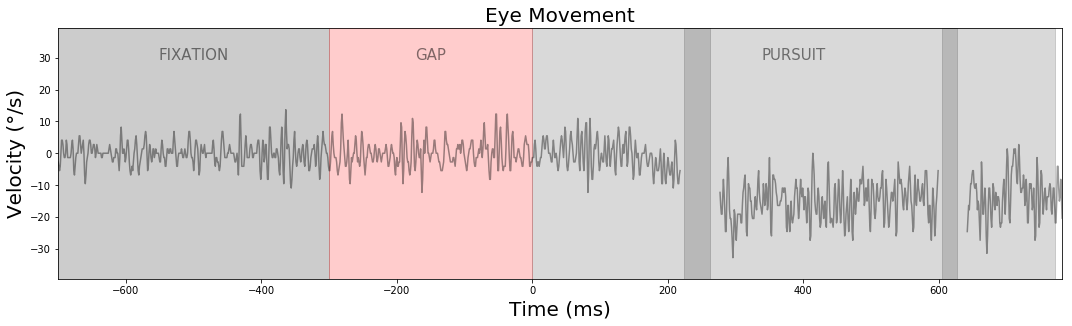

fct Plot_Full_data
--------------------------------------------
block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1


figure data saved in _static/result/velocity_1 for block 1
figure data saved in _static/result/velocity_2 for block 2


In [12]:
demo_plot_data('velocity')

**position**

fct Plot_data
--------------------------------------------


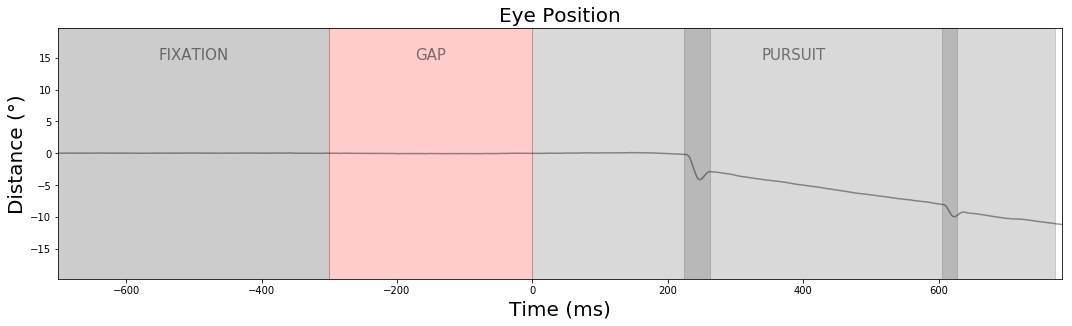

fct Plot_Full_data
--------------------------------------------
block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1


figure data saved in _static/result/position_1 for block 1
figure data saved in _static/result/position_2 for block 2


In [13]:
demo_plot_data('position')

**saccade**

fct Plot_data
--------------------------------------------


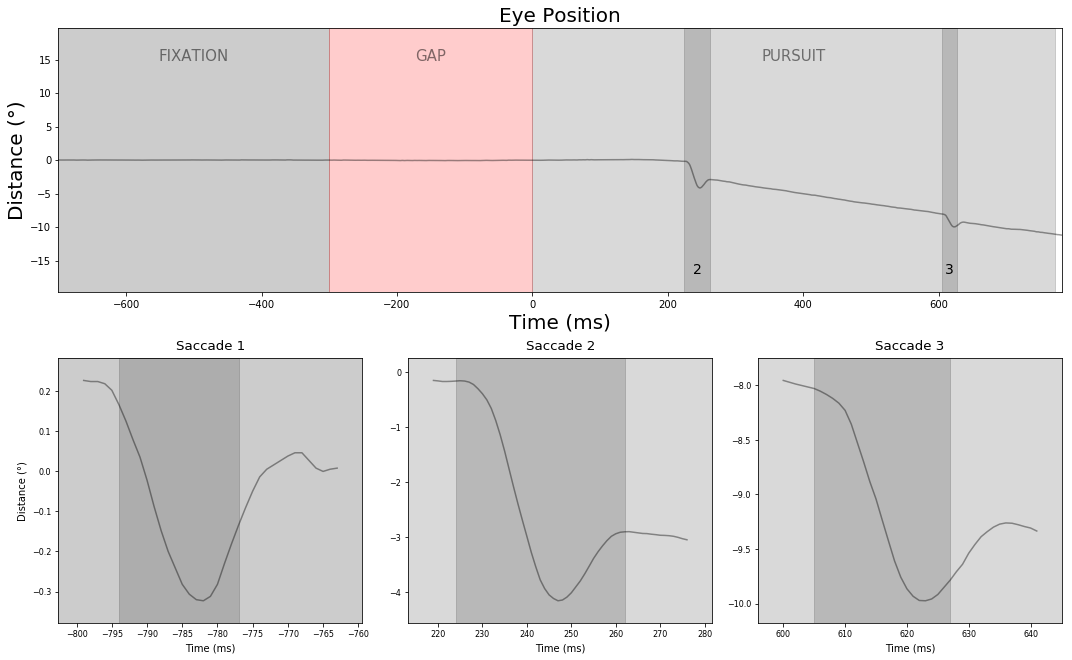

fct Plot_Full_data
--------------------------------------------
block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1


figure data saved in _static/result/saccade_1 for block 1
figure data saved in _static/result/saccade_2 for block 2


In [14]:
demo_plot_data('saccade')

## Filter

the filt option allows you to apply a low-pass filter on the data,

filt can be:

- ``'position'``: filter the position,
- ``'velocity'``: filter the speed,
- ``'velocity-position'``: filter the position then the speed
- ``None``: the data will not be filtered

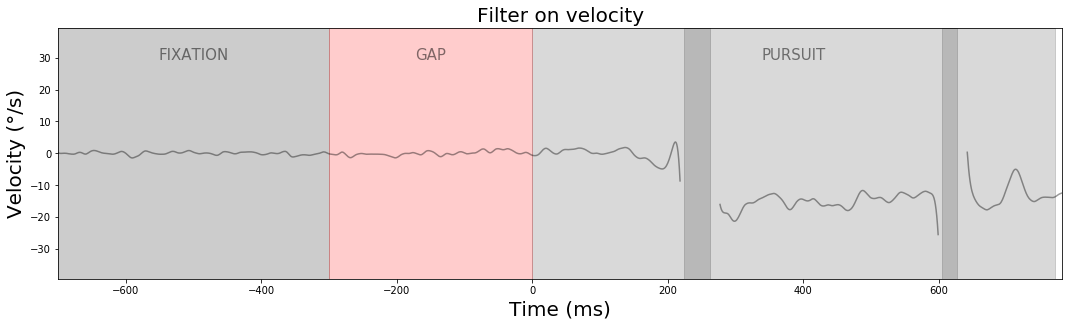

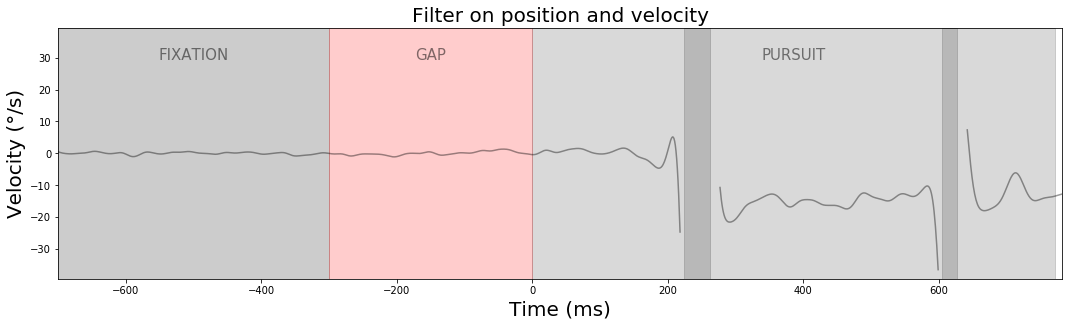

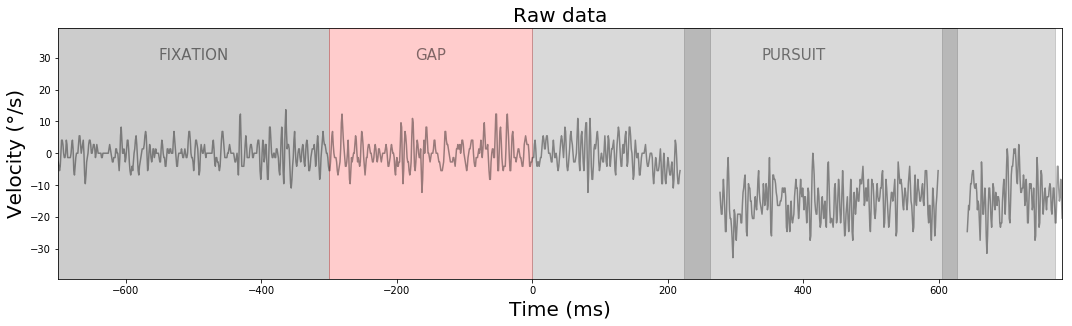

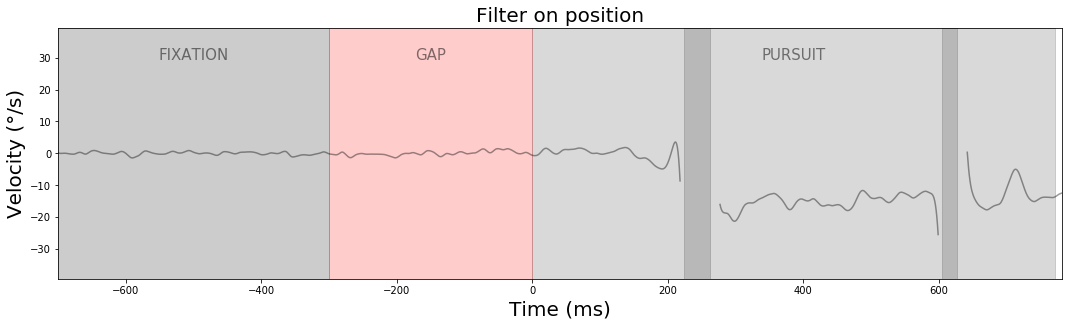

In [15]:
#--------------------------------------------
# Plot_filt_data
#--------------------------------------------
filts = {None:'Raw data',
         'position':'Filter on position',
         'velocity':'Filter on velocity',
         'velocity-position':'Filter on position and velocity'}

show = 'velocity' # can be 'velocity', 'position' or 'saccade'


for filt, title in filts.items() :
    fig, axs = Plot.plot_data(data=data, show=show, trials=trial, block=block,
                              filt=filt, cutoff=30, sample_rate=1000,
                              title=title)

# Classical Methode

In [16]:
classical_lat = A.classical_method.latence(velocity_NAN)
classical_max = A.classical_method.maximum(velocity_NAN, arg.TargetOn)
classical_anti = A.classical_method.anticipation(velocity_NAN, arg.TargetOn)

# or
#classical_lat, classical_anti, classical_max = A.classical_method.Full(velocity_NAN, arg.TargetOn)

/usr/local/lib/python3.5/dist-packages/ANEMO-0.0.1-py3.5.egg/ANEMO/ANEMO.py:661: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/ANEMO-0.0.1-py3.5.egg/ANEMO/ANEMO.py:682: RuntimeWarning: Mean of empty slice


In [17]:
print(classical_lat, classical_anti, classical_max)

nan nan nan


# Equation

**velocity**

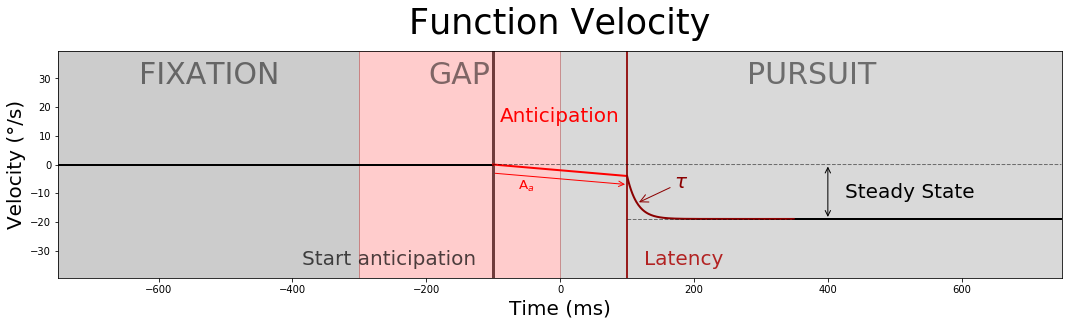

In [18]:
fig, axs = Plot.plot_equation(equation='fct_velocity')

**position**

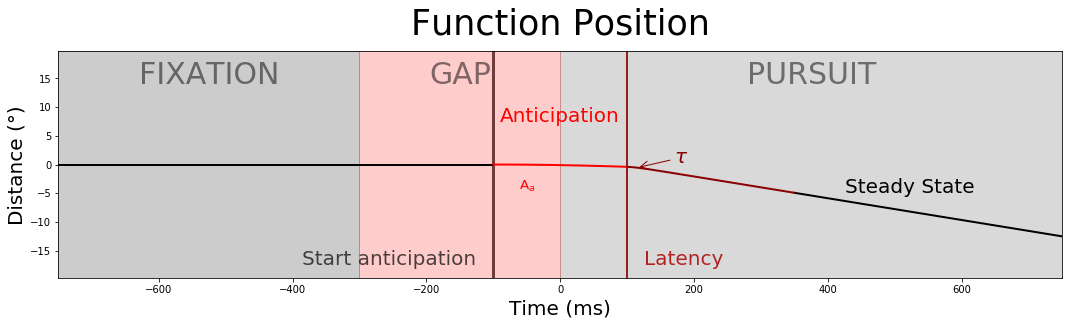

In [19]:
fig, axs = Plot.plot_equation(equation='fct_position')

**saccade**

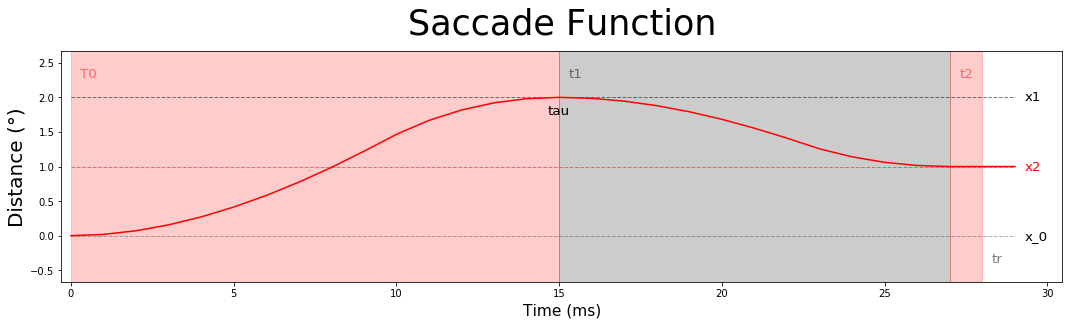

In [20]:
fig, axs = Plot.plot_equation(equation='fct_saccade')

# Fit

In [21]:
Fit = ANEMO.Fit(param_exp)

## generation-param-fit

In [22]:
param_fit = Fit.generation_param_fit(equation='fct_velocity', data_x=data[0]['x'],
                                     dir_target=arg.dir_target, trackertime=arg.trackertime,
                                     TargetOn=arg.TargetOn, StimulusOf=arg.StimulusOf, saccades=arg.saccades,
                                     value_latence=None, value_maxi=None, value_anti=None, before_sacc=5, after_sacc=15)

**velocity**

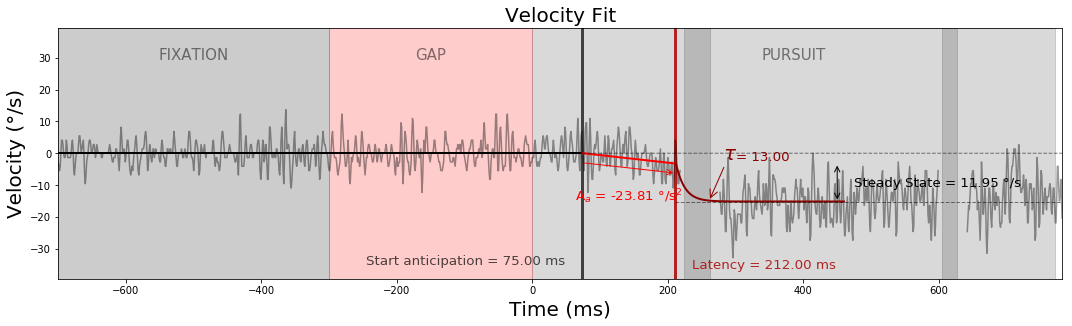

In [23]:
fig, axs = Plot.plot_fit(data=data, equation='fct_velocity', trials=trial, block=block, filt=None)

**position**

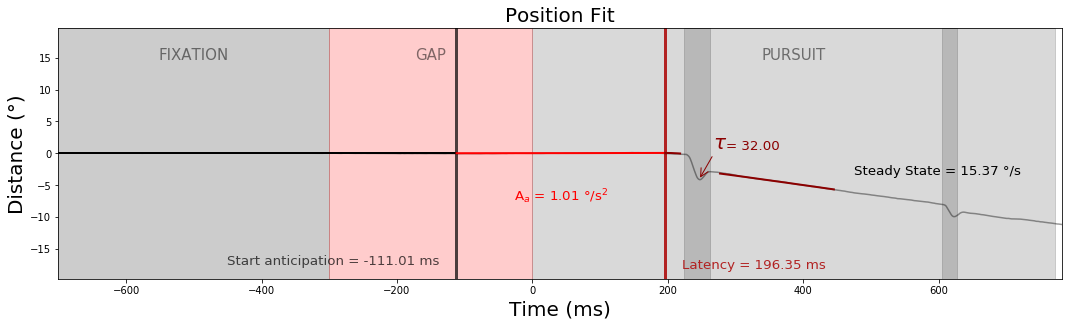

In [24]:
fig, axs = Plot.plot_fit(data=data, equation='fct_position', trials=trial, block=block, filt=None)

**saccade**

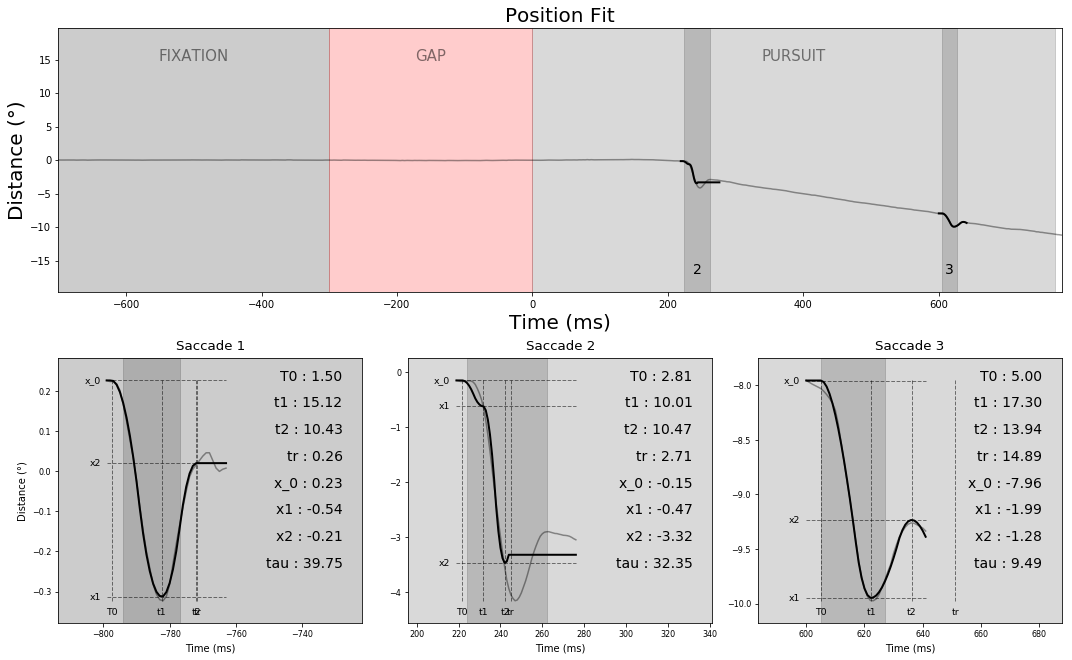

In [25]:
fig, axs = Plot.plot_fit(data=data, equation='fct_saccade', trials=trial, block=block, filt=None)

# Full

## Fit

In [26]:
import pickle

**velocity**

In [27]:
param = Fit.Fit_full(data=data, equation='fct_velocity', plot=True,
                     N_blocks=N_blocks, N_trials=N_trials,
                     filt=None,
                     file_fig='_static/result/Fit_velocity')
    
    
print('-'*47, '\n', 'figure fit saved in _static/result/Fit_velocity', sep='')

# saves the fit parameters
with open('_static/result/param_Fit_velocity.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(param)
print('-'*52, '\n', 'param fit saved in _static/result/param_Fit_velocity', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
-----------------------------------------------
figure fit saved in _static/result/Fit_velocity
----------------------------------------------------
param fit saved in _static/result/param_Fit_velocity


**position**

In [28]:
param = Fit.Fit_full(data=data, equation='fct_position', plot=True,
                     N_blocks=N_blocks, N_trials=N_trials,
                     filt=None,
                     file_fig='_static/result/Fit_position')
    
    
print('-'*47, '\n', 'figure fit saved in _static/result/Fit_position', sep='')

# saves the fit parameters
with open('_static/result/param_Fit_position.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(param)
print('-'*52, '\n', 'param fit saved in _static/result/param_Fit_position', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
-----------------------------------------------
figure fit saved in _static/result/Fit_position
----------------------------------------------------
param fit saved in _static/result/param_Fit_position


**saccade**

In [29]:
param = Fit.Fit_full(data=data, equation='fct_saccade', plot=True,
                     N_blocks=N_blocks, N_trials=N_trials,
                     filt=None,
                     file_fig='_static/result/Fit_saccade')
    
    
print('-'*46, '\n', 'figure fit saved in _static/result/Fit_saccade', sep='')

# saves the fit parameters
with open('_static/result/param_Fit_saccade.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(param)
print('-'*51, '\n', 'param fit saved in _static/result/param_Fit_saccade', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
----------------------------------------------
figure fit saved in _static/result/Fit_saccade
---------------------------------------------------
param fit saved in _static/result/param_Fit_saccade


# Retrieving the parameters

In [30]:
def Retrieving_param(data_show):
    with open('_static/result/param_Fit_%s.pkl'%data_show, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    print('\nParam recorded\n---------------\n')
    print(param.keys())
    
    print('\nFor the first trial\n---------------\n')
    for name in param.keys() :
        if name != 'fit' and name!='observer' :
            print(name, '=', param[name][block][trial])

**velocity**

In [31]:
Retrieving_param('velocity')


Param recorded
---------------

dict_keys(['maxi', 'old_anti', 'observer', 'latence', 'old_latence', 'v_anti', 'old_max', 'fit', 'start_anti', 'tau'])

For the first trial
---------------

maxi = 11.947688290137648
old_anti = 5.2029031109490695
latence = 211.9999995956723
old_latence = nan
v_anti = -23.805279360219536
old_max = 14.807736090766625
start_anti = 74.99999999995998
tau = 13.000000071848424


**position**

In [32]:
Retrieving_param('position')


Param recorded
---------------

dict_keys(['maxi', 'old_anti', 'observer', 'latence', 'old_latence', 'v_anti', 'old_max', 'fit', 'start_anti', 'tau'])

For the first trial
---------------

maxi = 15.367464795043494
old_anti = 5.2029031109490695
latence = 196.35326495100298
old_latence = nan
v_anti = 1.0106661120280975
old_max = 14.807736090766625
start_anti = -111.01380810289334
tau = 32.0021265083987


**saccade**

In [33]:
Retrieving_param('saccade')


Param recorded
---------------

dict_keys(['x_0', 't2', 'observer', 'tau', 'x1', 't1', 'x2', 'tr', 'T0', 'fit'])

For the first trial
---------------

x_0 = [0.2272847148467203, -0.15334872327007254, -7.958311077230758]
t2 = [10.427471643651351, 10.468903043142417, 13.938671800591317]
tau = [39.748470336932996, 32.353245365355164, 9.486777647869626]
x1 = [-0.5403870450794503, -0.470849767691071, -1.9886089942475516]
t1 = [15.11919791704251, 10.01001220733005, 17.30352269809784]
x2 = [-0.20657746249432218, -3.3206742243690126, -1.2756707098296949]
tr = [0.2606254276512182, 2.713879744320553, 14.89065017335387]
T0 = [1.4957655349267789, 2.807204981522389, 5.000000126645588]
